# Input
After having looked into Multiclass Logistic Regression with some chosen features previously, I decided to compare all possible feature combinations in order to determine the ones that work best. 

# Multiclass logistic regression – feature combinations

In [2]:
# Importing libraries 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from ml import *
from itertools import chain, combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.special import expit

In [3]:
# Splitting function from Oscar
def split_classes(n_classes = 3):
    class_labels = []
    
    # Create sorted list of unique values in df['User score']
    current_classes = np.sort(df['User score'].unique()) 
    
    # Split this array in n_classes of same size
    split = np.array_split(current_classes, n_classes) 
    
    for row in df.iterrows(): # Iterate over every row in the dataframe
        for label, class_ranges in enumerate(split): # Iterate over every sub array in split
            if(row[1]['User score'] in class_ranges): # If user score for row is in sub array
                class_labels.append(label) # Append class label to list
    return class_labels # Return list with class labels

# Create df with classes
df = pd.read_csv('/datc/nano/notebooks/Target variable & Features (V3).csv', index_col = 0)
df['Class'] = split_classes()

# Creating dataframe with only yen values
df_yen = df[df['Threshold method'] =='yen']

print('Class 0: ', df_yen[df_yen['Class']==0]['User score'].count(), ' records')
print('Class 1: ', df_yen[df_yen['Class']==1]['User score'].count(), ' records')
print('Class 2: ', df_yen[df_yen['Class']==2]['User score'].count(), ' records')
print('Class 3: ', df_yen[df_yen['Class']==3]['User score'].count(), ' records')

df_yen.head()

Class 0:  25  records
Class 1:  11  records
Class 2:  22  records
Class 3:  0  records


,Threshold method,Threshold: area spread,Threshold: border,Threshold: count,Threshold: fill,Threshold: intensity,Threshold: separation,User score,Class
Id,,,,,,,,,
5f11480a2d99b96663b97fdb,yen,0.265214,1.866963,13.192785,0.215541,1.711409,0.106493,9,2
5f15419a79e27502789bbbd1,yen,0.154306,5.648380,0.010033,0.184900,4.396552,0.355659,4,0
5f27c1cced3aa3f0c260b246,yen,0.012426,1.814439,2.246626,0.184488,1.734694,0.139754,1,0
5f30f7b9ed3aa3f0c260b563,yen,0.408562,4.563709,0.019553,0.220224,2.833333,0.162283,2,0
5f30fafded3aa3f0c260b6bc,yen,0.035861,2.068226,0.671646,0.160934,1.902985,0.130774,4,0


In [5]:
# Function to compare all feature combinations from Yoran

attributes = ['Threshold: separation', 'Threshold: border', 'Threshold: area spread' , 
              'Threshold: fill', 'Threshold: count', 'Threshold: intensity']

def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))

subsets = list(all_subsets(attributes))
accuracy_scores_all = []

for subset in subsets:
    
    # Logistic Regression model by me:
    
    x = df_yen[list(subset)]
    y = df_yen['Class']
    
    # Dividing into training and validation data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
    
    # Normalizing training data
    scaler = StandardScaler()
    x_train_array = scaler.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_array, index=x_train.index, columns=x_train.columns)
    x_test_array = scaler.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_array, index=x_test.index, columns=x_test.columns)
    
    # Training model
    model = LogisticRegression(multi_class='auto', random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy_scores_all.append(accuracy_score(y_test, y_pred))


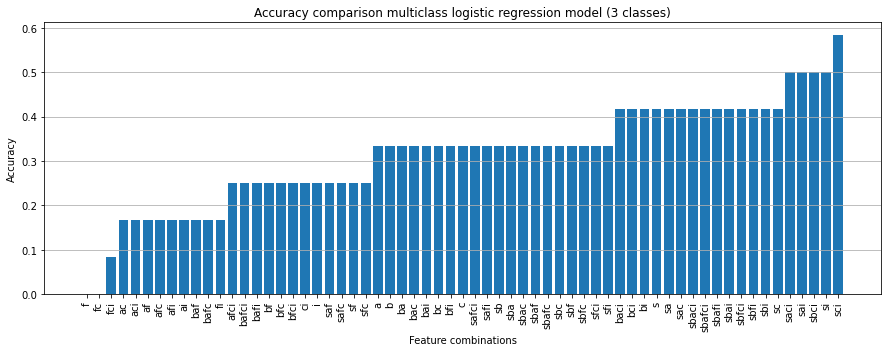

In [5]:
# Visualizing the combinations (Code from Yoran)
subset_labels = []
for subset in subsets:
    subset_label = ''
    for i in range(len(subset)):
        subset_label += subset[i][11]
    subset_labels.append(subset_label)
    
plt.figure(figsize=(15,5))
t = [(a, l) for a, l in zip(accuracy_scores_all, subset_labels)]
t.sort()
accuracy,labels = zip(*t)

plt.bar(range(len(accuracy)), accuracy, tick_label=labels)
plt.xticks(np.arange(len(accuracy)), labels, rotation=90)
plt.grid(True, axis= 'y')
plt.title('Accuracy comparison multiclass logistic regression model (3 classes)')
plt.xlabel('Feature combinations')
plt.ylabel('Accuracy')
plt.show()

# Output
This file shows that using less features can actually be more advantageous than using every feature we were given and combining them all. 
Even though the results are not extremely promising, we decided to directly compare this model with other models in our experiment.